In [1]:
import numpy as np
import random
import math 
import matplotlib.pyplot as plt
from scipy.signal import sawtooth
from scipy.signal import square
from scipy.signal import sawtooth
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib.patches as patches
import cv2

## Fourier series

In [2]:
def fseries(x, signal, K):
    
    """
    Returns an approximation of a given signal with a Fourier series approximation
    of K coefficients.
    
    Parameters:
    ----------
    x: independent variable (time)
    signal: function of x to be approximated
    K: number of harmonics to be used
    
    Returns:
    --------
    series: Fourier series of the signal
    a_0: coefficient with k=0 
    a: array of coefficients for odd components (cosine)
    b: array of coefficients for even components (sine)
    
    
    """
    
    ## reconstructed signal
    #print(len(x))
    xr = np.zeros((len(x)))
    #print(xr)
    ## scaling factor
    c = (x[-1]-x[0])/len(x)

    a_0 = np.dot(signal, np.ones(len(x))) ## average of the signal over the range  f(x).newArray
    a_0 = c*a_0/np.pi
    
    
    ## Fourier coefficients arrays
    a = np.zeros(K)
    b = np.zeros(K)
    
    for k in range(1,K+1):
        ## evaluates coefficients
        a_k = c*np.dot(signal,np.cos(k*x))*1/np.pi
        a[k-1]=a_k
        b_k = c*np.dot(signal,np.sin(k*x))*1/np.pi
        b[k-1]=b_k
        
        ## computes series
        xr = xr + a_k*np.cos(k*x) + b_k*np.sin(k*x)
        series = 1/2*a_0+xr
    
    return series, a_0, a, b

In [3]:
def best_k(x, signal, K, tol):


    ## compute function norm keeping into account the scaling factor
    c = (x[-1]-x[0])/len(x) ##(b-a)/n
    norm = c*np.dot(signal, signal)

    for k in range(1,K+1):
        reconstructed_signal, a_0, a, b = fseries(x,signal, k)

        ## Parseval 
        approx_norm = np.pi*(np.sum(a**2) + np.sum(b**2) + a_0**2/4)

        delta = np.abs(approx_norm-norm)
        if (np.abs(delta) < tol):
            break
        
    #print('the number of used harmonics is %d' % k)
    
    ## plots the signal and its approximation
    plt.plot(x, signal, 'r', label='original signal')
    plt.plot(x, reconstructed_signal, 'g', label='Fourier series')
    plt.legend(loc='upper right')
    return delta

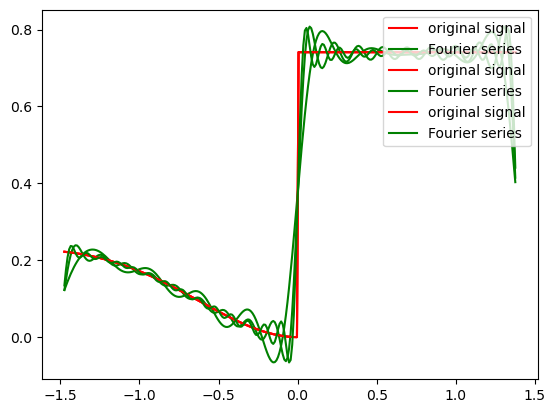

In [5]:
a = random.uniform(-2, -1)
b = random.uniform(1, 2)

p = random.uniform(0, 1)
q = random.uniform(0, 1)
r = random.uniform(0, 1)
s = random.uniform(0, 1)

t = np.arange(a, b, 0.01)

signal = []

for i in t:
    if a <= i <= 0:
        signal.append((p*np.exp(q*i))* np.sin(np.log(1+r*i**2)))
    elif 0 <= i <= b:
        signal.append(s)
        

k_array = [20, 40, 60]
for k in k_array:
    best_k(t, signal, k, 1/10)


<b>Comment: this plot concentrate that if k increases, the Gibbs phenomenon will decrease because much number of the combination sin and cos is near to real function. On the other hand, when n grows up, we have more overshoot and undershoot.</b>

## Fourier transform

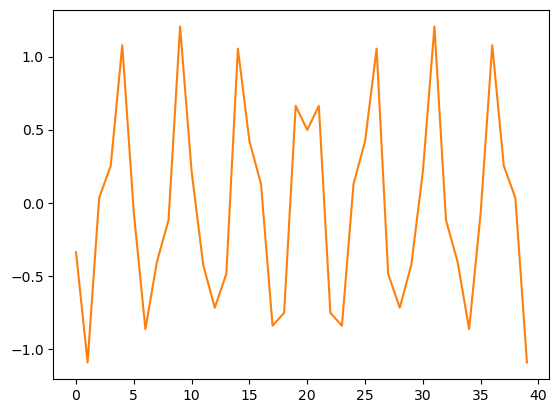

In [6]:
alfa = random.uniform(-1, 1)
beta = random.uniform(-1, 1)
w0 = random.uniform(1, 5)
w1 = random.uniform(10, 20)

time = np.arange(-20, 20, 1)
y = (alfa * np.cos(w0 * time)) + (beta * np.cos(w1 * time))

plt.plot(0, 1, y)

/home/sina/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


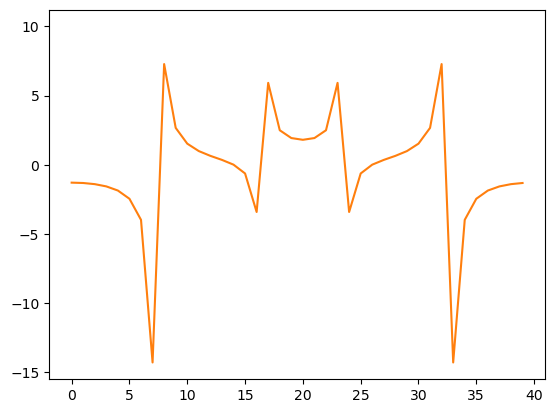

In [7]:
fft_y = np.fft.fft(y)

plt.plot(0, 10, fft_y[:40])

<b>
In terms of δ functions, the presence of a peak at a particular frequency in the Fourier transform can be interpreted as the presence of a δ function at that frequency in the signal.
A peak in the Fourier transform indicates the presence of a frequency component in the input signal. The height or magnitude of the peak corresponds to the amplitude or strength of the frequency component.
</b>

## ailising

Temporal sampling rate for 10% decay: 0.7132330586807729
Temporal sampling rate for 1% decay: 2.7732330586805816


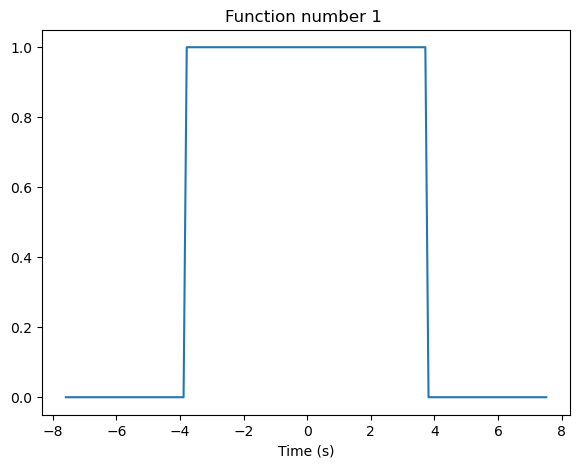

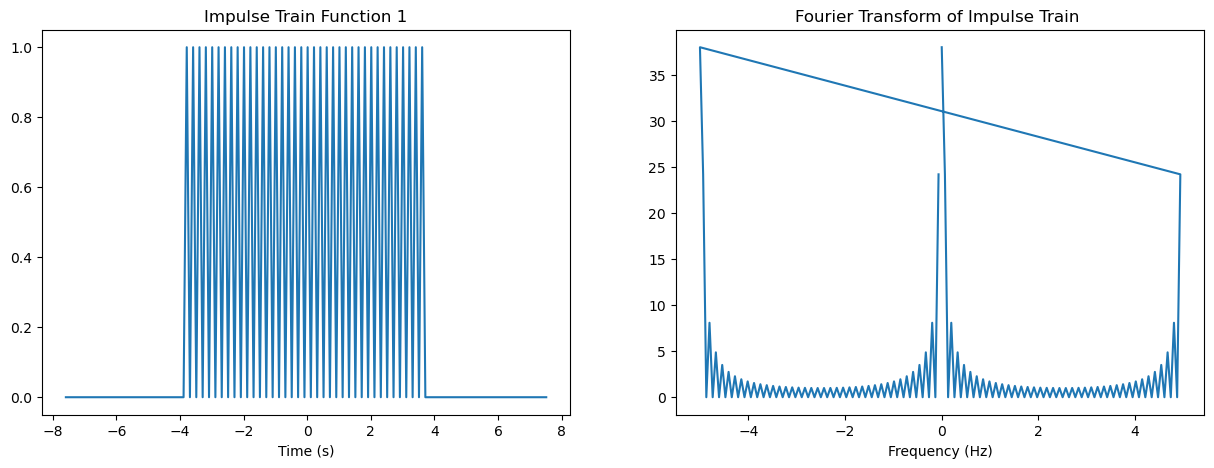

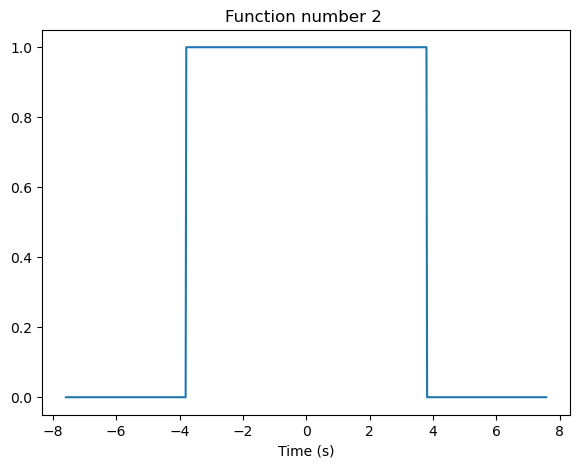

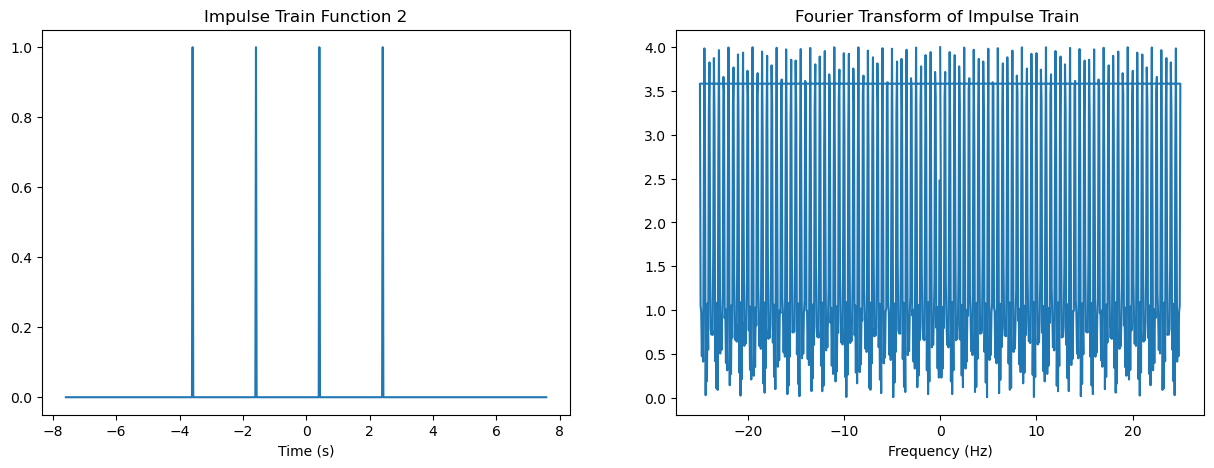

In [8]:
def pT(t, T):
    p = np.zeros_like(t)
    p[np.abs(t) <= T] = 1
    return p

fs1 = 10
fs2 = 50

T = np.random.uniform(1, 4)
t1 = np.arange(-2*T, 2*T, 1/fs1)
t2 = np.arange(-2*T, 2*T, 1/fs2)

signal1 = pT(t1, T)
signal2 = pT(t2, T)

# Calculate train of impulses
impulse_train1 = []
for count, t in enumerate(t1):
    if count % 2 == 0 and np.abs(t) <= T:
        impulse_train1.append(1)
    else:
        impulse_train1.append(0)

impulse_train2 = []
for count, t in enumerate(t2):
    if count % 100 == 0 and np.abs(t) <= T:
        impulse_train2.append(1)
    else:
        impulse_train2.append(0)


ft_impulse_train1 = np.fft.fft(impulse_train1)
ft_impulse_train2 = np.fft.fft(impulse_train2)

freq1 = np.fft.fftfreq(len(t1), 1/fs1)
freq2 = np.fft.fftfreq(len(t2), 1/fs2)

def temporal_sampling_rate(f, max_value, decay_percentage):
    """Calculate the temporal sampling rate for given decay percentage of Fourier transform"""
    decay_value = max_value * (decay_percentage / 100)
    idx = np.argmin(np.abs(f - decay_value))
    return idx

max_value_1 = np.abs(ft_impulse_train1).max()
max_value_2 = np.abs(ft_impulse_train2).max()

temporal_rate_1 = temporal_sampling_rate(np.abs(ft_impulse_train1), max_value_1, 10)
temporal_rate_2 = temporal_sampling_rate(np.abs(ft_impulse_train2), max_value_2, 1)
print("Temporal sampling rate for 10% decay:", t1[temporal_rate_1])
print("Temporal sampling rate for 1% decay:", t2[temporal_rate_2])


plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Function number 1 ')
plt.plot(t1, signal1)
plt.xlabel('Time (s)')
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Impulse Train Function 1')
plt.plot(t1, impulse_train1)
plt.xlabel('Time (s)')
plt.subplot(122)
plt.title('Fourier Transform of Impulse Train ')
plt.plot(freq1, np.abs(ft_impulse_train1))
plt.xlabel('Frequency (Hz)')
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Function number 2 ')
plt.plot(t2, signal2)
plt.xlabel('Time (s)')
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Impulse Train Function 2')
plt.plot(t2, impulse_train2)
plt.xlabel('Time (s)')
plt.subplot(122)
plt.title('Fourier Transform of Impulse Train ')
plt.plot(freq2, np.abs(ft_impulse_train2))
plt.xlabel('Frequency (Hz)')
plt.show()

<b>
High sampling rate means that we can have better representation of the signal.
In first case (decay=10) we have high frequency.  lower temporal sampling rate will result in a wider frequency spectrum with higher frequency components
</b>


## LTI 

In [9]:
a = random.uniform(-2,-1)
b = random.uniform(1, 2)

p = random.uniform(0, 2)
q = random.uniform(0, 2)
r = random.uniform(0, 2)
T = random.uniform(0, 2)

t = np.arange(a, b, 0.001)

In [10]:
def f_t(t):
    return p * np.exp(q * t) * np.sin(np.log(1 + r * t**2))

def g_t(t):
    g_t_list = []
    for i in t:
        if abs(i) <= T:
            g_t_list.append(1)
        else:
            g_t_list.append(0)
    return g_t_list

In [11]:
f_t = f_t(t)
g_t = g_t(t)
c = np.convolve(f_t, g_t, mode='same')
c_normalize = c / np.sum(f_t)

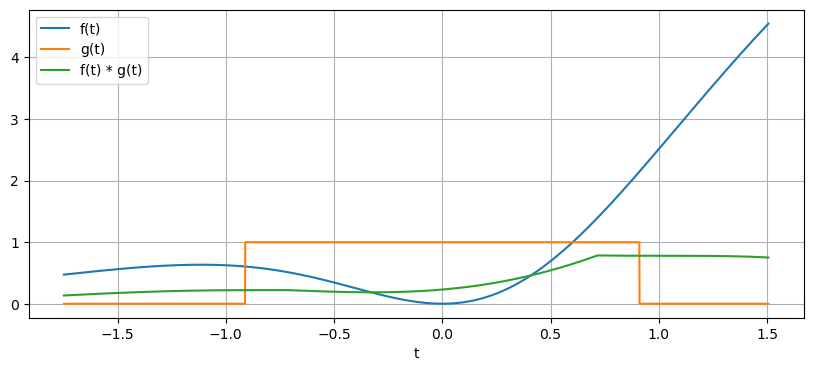

In [12]:
plt.figure(figsize=(10, 4))
plt.plot(t, f_t, label='f(t)')
plt.plot(t, g_t, label='g(t)')
plt.plot(t, c_normalize, label='f(t) * g(t)')
plt.xlabel('t')
plt.legend()
plt.grid()

(-1.5, 1.0)

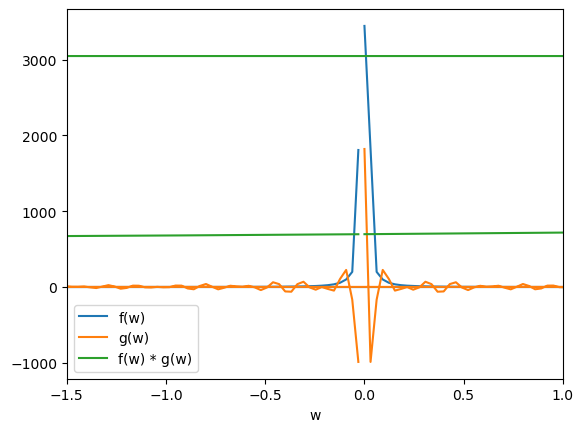

In [13]:
freq = np.fft.fftfreq(len(t), 0.01)

f_t_fft = np.fft.fft(f_t)
g_t_fft = np.fft.fft(g_t)
c_fft = f_t_fft * g_t_fft
c = np.fft.ifft(c_fft).real

plt.plot(freq, f_t_fft, label='f(w)')
plt.plot(freq, g_t_fft, label='g(w)')
plt.plot(freq, c, label='f(w) * g(w)')
plt.xlabel('w')
plt.legend()
plt.xlim(-1.5, 1)

<b>
The convolution for two signal should be equal to convolution for fourier transform of f and g convolution
</b>

## Kalman filtering

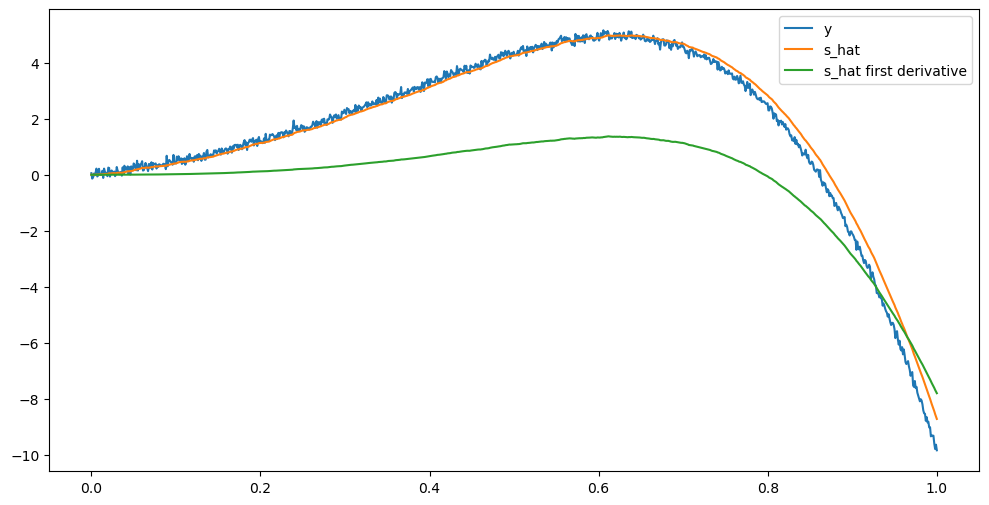

In [14]:
n = 1000
T = np.linspace(0, 1, n)
p = np.random.uniform(2, 4)
q = np.random.uniform(2, 4)

y = np.sin(p*T) * np.exp(q*T) + np.random.normal(0, 0.1, len(T))

def kalman_filter():
    n = 2
    m = 1
    phi = np.array([[1, T[1]-T[0]], [0, 1]])
    H = np.array([1, 0])[None, :]
    Q = np.array([[0.05, 0], [0, 0.05]])
    R = 10

    s = np.zeros((n, 1))
    P = np.zeros((n, n))

    s_est = np.zeros((n, len(T)))

    for i in range(len(T)):
        s_pred = np.dot(phi, s)
        P = np.dot(np.dot(phi, P), phi.T) + Q
        K = np.dot(P, H.T) / (np.dot(np.dot(H, P), H.T) + R)

        s = s_pred + np.dot(K, y[i] - np.dot(H, s_pred))

        P = np.dot(np.eye(n) - np.dot(K, H), P)

        s_est[:, i] = s[:, 0].flatten()

    return s_est

s_est = kalman_filter()
f = s_est[0, :]
df = s_est[1, :]

plt.figure(figsize=(12, 6))
plt.plot(T, y, label="y")
plt.plot(T, f, label="s_hat")
plt.plot(T, df, label="s_hat first derivative")
plt.legend()
plt.show()

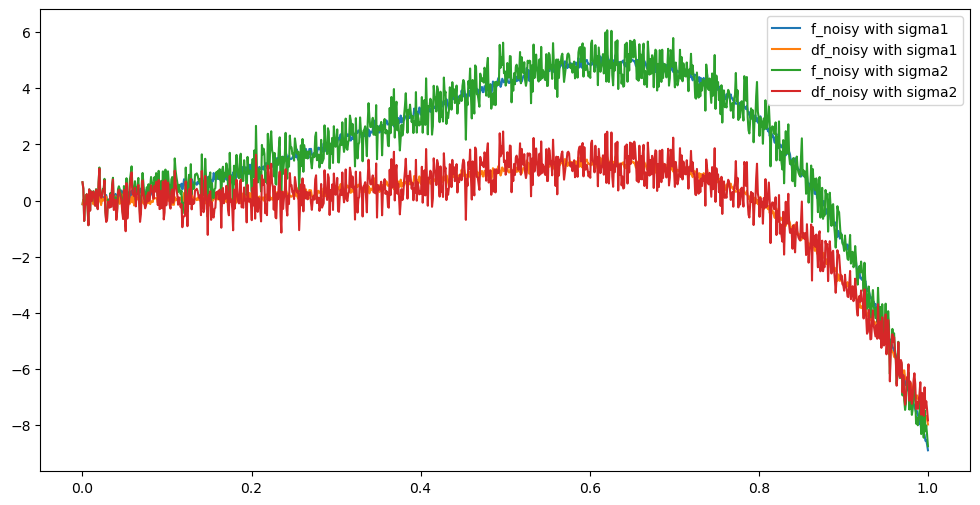

In [15]:
sigma1 = 0.1
sigma2 = 0.5

epsilon1 = np.random.normal(0, sigma1, n)
epsilon2 = np.random.normal(0, sigma2, n)

f_noisy1 = f + epsilon1
df_noisy1 = df + epsilon1

f_noisy2 = f + epsilon2
df_noisy2 = df + epsilon2

plt.figure(figsize=(12, 6))
plt.plot(T, f_noisy1, label="f_noisy with sigma1")
plt.plot(T, df_noisy1, label="df_noisy with sigma1")
plt.plot(T, f_noisy2, label="f_noisy with sigma2")
plt.plot(T, df_noisy2, label="df_noisy with sigma2")
plt.legend()
plt.show()

<b>
This code will generate two sets of plots for the two different values of the noise process covariance (sigma = 0.1 and sigma = 0.5), showing the estimates against the values for f and f' computed analytically.
</b>

## wavelet

In [16]:
def haar_wavelet_transform(img):
    n, m = img.shape

    h0 = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
    h1 = np.array([1/np.sqrt(2), -1/np.sqrt(2)])

    new_array = np.zeros_like(img)
    detail_array = np.zeros_like(img)
    
    for i in range(n):
        for j in range(0, n, 2):
            two_pixels = img[i, j:j+2]
            new_array[i, j // 2] = np.dot(h0, two_pixels)
            detail_array[i, j // 2] = np.dot(h1, two_pixels)
    return new_array, detail_array

In [17]:
img_with_spesific_range_of_n_px = np.random.randint(24, 27, (16, 16))
img_with_spesific_range_of_m_px = np.random.randint(201, 205, (16, 16))
J32_spesific_px = np.concatenate((img_with_spesific_range_of_n_px, img_with_spesific_range_of_m_px), axis=1)
random_image = np.random.randint(0, 255, (32, 32))
I, detail_array1 = haar_wavelet_transform(random_image)
sum_detailI = np.sum(np.abs(detail_array1) > 1/100) / (32 * 32)

Ir, detail_array2 = haar_wavelet_transform(J32_spesific_px)
sum_detailIr = np.sum(np.abs(detail_array2) > 1/100) / (32 * 32)

print(sum_detailI, sum_detailIr)

0.4951171875 0.0234375


<b>
Sum detail is used as a measure of the level of detail in an image. If the fraction is high, the image contains a lot of detail information, while if the fraction is low, the image contains less detail information.
</b>

## Image Proccessing

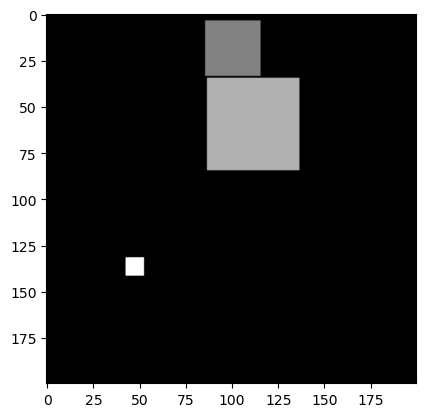

In [20]:
pixel_image = np.zeros((200, 200), dtype=np.uint8)

size = [10, 30, 50]
for i in range(len(size)):
    x = np.random.randint(0, 140)
    y = np.random.randint(0, 140)
    brightness = np.random.randint(50, 256)
    pixel_image[y: y + size[i], x: x + size[i]] = brightness


plt.imshow(pixel_image, cmap='gray')

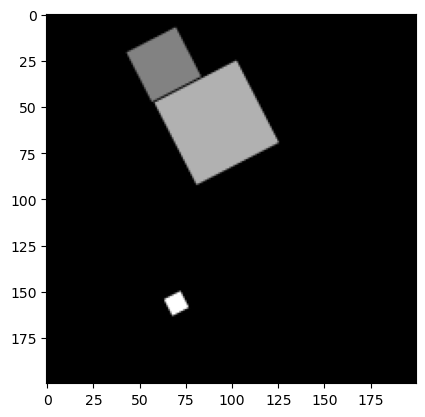

In [21]:
random = np.random.uniform(10, 80)
M = cv2.getRotationMatrix2D((100,100), random, 1)
pixel_image_rotate = cv2.warpAffine(pixel_image, M, (200, 200))

plt.imshow(pixel_image_rotate, cmap='gray')

## 2D DFT

/tmp/ipykernel_6002/1051944270.py:6: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(I_dft)), cmap='gray')


Text(0.5, 1.0, 'DFT of Ir')

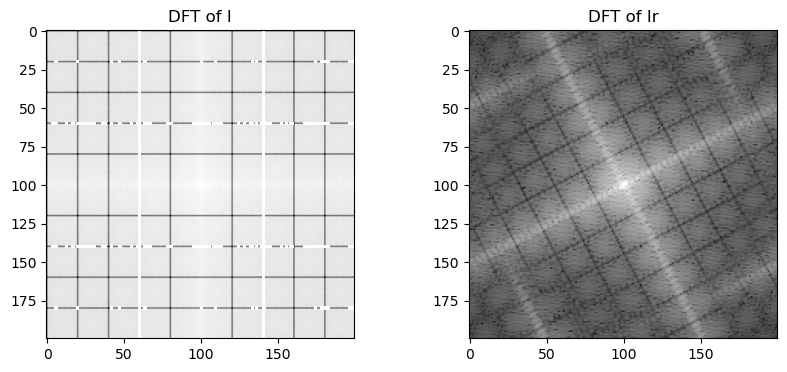

In [22]:
I_dft = np.fft.fftshift(np.fft.fft2(pixel_image))
Ir_dft = np.fft.fftshift(np.fft.fft2(pixel_image_rotate))

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(np.log(np.abs(I_dft)), cmap='gray')
plt.title('DFT of I')

plt.subplot(122)
plt.imshow(np.log(np.abs(Ir_dft)), cmap='gray')
plt.title('DFT of Ir')

By visualizing the DFTs of the two images, we can observe their frequency content and analyze the differences between them. In the center we have zero frequency.

## Image filtering

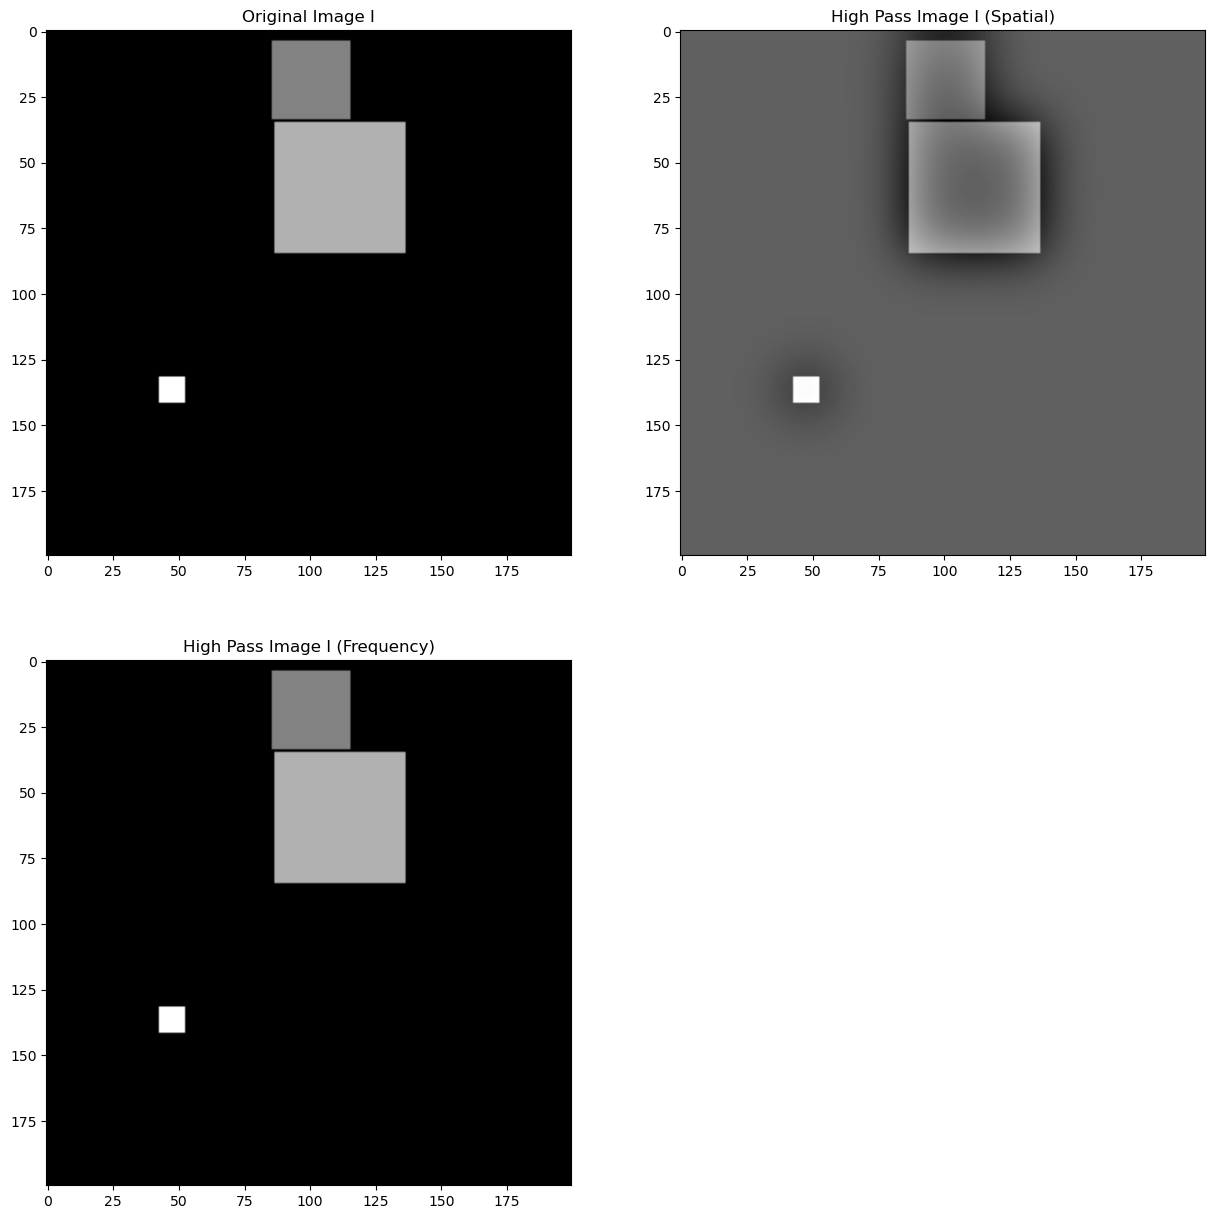

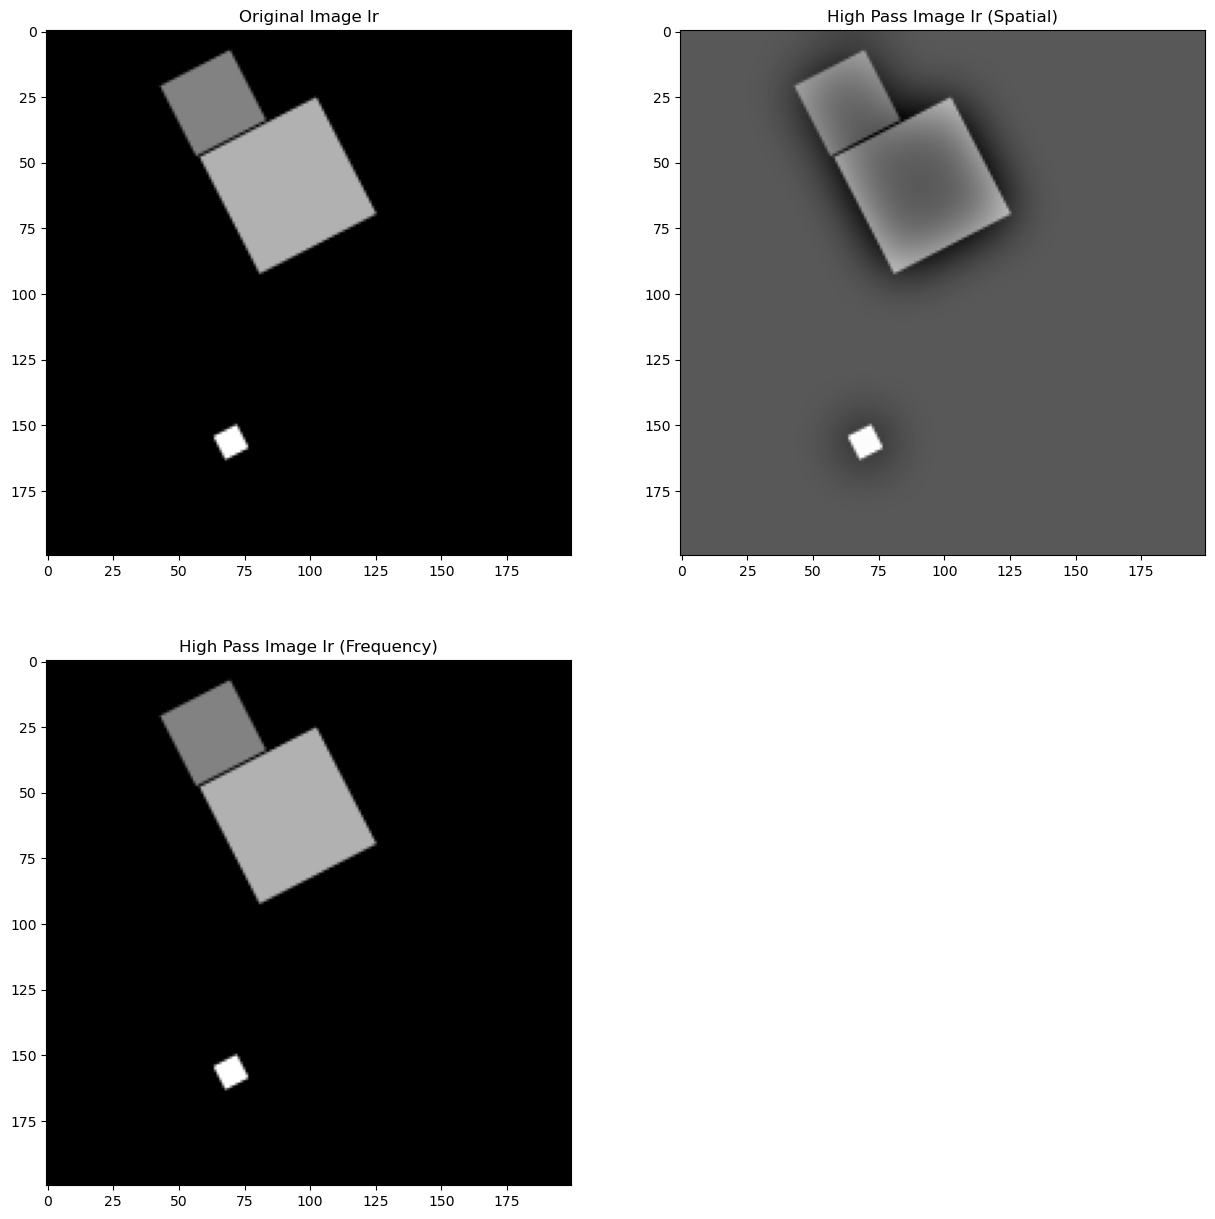

In [23]:
I = pixel_image
Ir = pixel_image_rotate

I = I.astype(np.float32) / 255
Ir = Ir.astype(np.float32) / 255

kernel_size = 51
sigma = 10
gaussian = cv2.getGaussianKernel(kernel_size, sigma)
gaussian = gaussian * gaussian.T

# remove high freq
I_high_pass = I - cv2.filter2D(I, -1, gaussian)
Ir_high_pass = Ir - cv2.filter2D(Ir, -1, gaussian)

I_f = np.fft.fft2(I)
Ir_f = np.fft.fft2(Ir)

gaussian_f = np.fft.fft2(gaussian, (200, 200))

I_high_pass_f = I_f - gaussian_f
Ir_high_pass_f = Ir_f - gaussian_f
I_high_pass_f = np.fft.ifft2(I_high_pass_f)
Ir_high_pass_f = np.fft.ifft2(Ir_high_pass_f)

plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(I, cmap='gray')
plt.title('Original Image I')
plt.subplot(222)
plt.imshow(I_high_pass, cmap='gray')
plt.title('High Pass Image I (Spatial)')
plt.subplot(223)
plt.imshow(np.abs(I_high_pass_f), cmap='gray')
plt.title('High Pass Image I (Frequency)')
plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(Ir, cmap='gray')
plt.title('Original Image Ir')
plt.subplot(222)
plt.imshow(Ir_high_pass, cmap='gray')
plt.title('High Pass Image Ir (Spatial)')
plt.subplot(223)
plt.imshow(np.abs(Ir_high_pass_f), cmap='gray')
plt.title('High Pass Image Ir (Frequency)')
plt.show()

when we do kernels like blur or gray filter, it's easier to convert. The rate is so important because it can convert important pixels to be lost.